In [3]:
import pandas as pd

In [5]:
dataset=pd.read_csv("insurance_pre.csv")

In [7]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [9]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [11]:
dataset=dataset.astype(int)

In [13]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [15]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [17]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [19]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [21]:
dependent=dataset[['charges']]

In [23]:
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)#assign splitted test and train dataset to diff variables

In [27]:
x_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28,0,0,0
196,39,32,0,0,0
438,52,46,5,0,0
183,44,26,0,0,0
1298,33,27,2,1,0
...,...,...,...,...,...
763,27,26,0,1,0
835,42,35,2,1,0
1216,40,25,0,1,0
559,19,35,0,1,0


In [29]:
from sklearn.tree import DecisionTreeRegressor

In [492]:
regressor=DecisionTreeRegressor(criterion='absolute_error',min_samples_split=14,ccp_alpha=0.5,splitter='random')
regressor=regressor.fit(x_train,y_train)

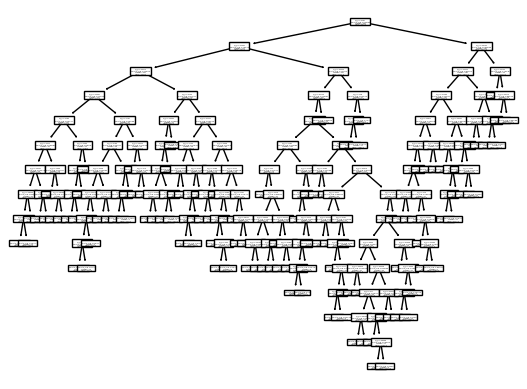

In [494]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [495]:
y_pred=regressor.predict(x_test)

In [496]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)#passing arguments as predited and actual output r2 function for Evaluatation
r_score

0.8833409439497004

In [500]:
#save the best model
import pickle#library to convert object to bites and save that in file
filename="finalized_model_Decision_tree.sav"#create a empty file

In [502]:
pickle.dump(regressor,open(filename,'wb'))

In [504]:
#load the saved model
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.predict([[17567,569876,0,1,0]])

C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [506]:
result

array([13887.])